# session 5. ML(K-NN, Clustering)을 활용한 투자 전략💥

안녕하세요, 데이크루 3기 ‘투데이💰︎' 팀입니다!

팀 투데이는 “투자에 데이터를 이용하다"의 약자입니다. 금융 데이터 수집&가공&모델링을 학습하면서 Financial Domain Knowledge와 Data Analysis Technologies 향상을 목적으로 하고 있습니다.
저희는 금융데이터와 AI기술이 만나는 전반적인 과정을 학습하고, 학습한 내용을 바탕으로 데이콘 이용자분들을 위한 콘텐츠를 제작하고 있습니다.  
**‘투데이💰︎’**의 다섯번째 포스팅의 주제는 **‘ML(K-NN, Clustering)을 활용한 투자 전략’**입니다.

아래 링크를 들어가시면 ‘투데이💰︎’의 전 커리큘럼을 보실 수 있습니다.

→ <a href="https://dacon.io/competitions/official/235946/codeshare/5502?utm_source=dacrew&utm_medium=441593&utm_campaign=dacrew_2">[투데이💰0편] 금융 데이터 분석에 앞서</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5547?utm_source=dacrew&utm_medium=441593&utm_campaign=dacrew_2">[투데이💰1편] 금융 데이터 수집</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5701?page=1&dtype=random">[투데이💰2편] 거시경제 분석</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5805?page=1&dtype=random">[투데이💰3편] 기본적 분석</a>    
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5896?page=1&dtype=random">[투데이💰4편] 기술적 분석</a>    


본 포스팅은 데이콘 서포터즈 “데이크루" 3기 활동의 일환입니다.

## **목차**
#### 1. K-NN 알고리즘 및 군집분석 이해
#### 2. K-NN을 활용한 투자 전략 구현
#### 3. 군집분석을 활용한 주식 종목 분류
#### 4. 백테스팅 및 성과 평가(기간별 주식 테마 별 수익률 비교)


# **1. K-NN 알고리즘 및 군집분석 이해**
## **분류와 회귀**

* 지도 학습의 대표적인 머신 러닝 방법
    * 분류(classification)  
    * 회귀(regression)

* 분류
    * 분류는 미리 정의된, 가능성 있는 여러 클래스 레이블(class label) 중 하나를 예측하는 것  
    * 두 개로만 나누는 이진 분류(binary Classification)와 셋 이상의 클래스로 분류하는  
      다중 분류(multiclass classification)로 나뉩니다  
    * 분류 예시 : 얼굴 인식, 숫자 판별(MNIST) 등

* 회귀
    * 연속적인 숫자 또는 부동소수점수(실수)를 예측하는 것  
    * 회귀 예시 : 주식 가격을 예측하여 수익을 내는 알고리즘 등



---

## **KNN이란?**
* 주변 k 개의 자료의 클래스(class) 중 가장 많은 클래스로 특정 자료를 분류하는 방식
* 새로운 자료를 가장 가까운 n개의 자료를 이용하여 투표하여 가장 많은 클래스로 할당하는 방식

<center><img src="https://drive.google.com/uc?id=1x2iN0iU7LYkhW8X229iJZRQZrHihlm41" height=300 width=400></center>  

* training-data 자체가 모형일 뿐 어떠한 추정 방법도 모형도 없음  
    * 즉, 데이터의 분포를 표현하기 위한 파라미터를 추정하지 않습니다
* 매우 간단한 방법이지만 performance는 떨어지지 않음  

<br>

* **게으른 학습(lazy learner) 또는 사례중심학습(instance-based learning)**  
    * 게으른 학습이란, 모형을 미리 만들지 않고 새로운 데이터가 들어오면 그때부터 계산을 시작하는 
      지도학습 알고리즘을 말합니다
<br>
* **데이터의 차원이 증가하면 차원의 저주(curse of dimension) 문제가 발생합니다**    
    * 즉, KNN은 차원이 증가할수록 성능의 저하가 심합니다
        * 데이터의 차원(dimensionality)이 증가할수록 해당 공간의 크기(부피)가 기하급수적으로  
        증가하여 동일한 개수의 데이터의 밀도는 차원이 증가할수록 급속도로 희박(sparse)해집니다.  
        * 차원이 증가할수록 데이터의 분포 분석에 필요한 샘플 데이터의 개수가 기하급수적으로  
        증가하게 되는데 이러한 어려움을 표현한 용어가 차원의 저주입니다.

<br>

* i번째 관측치와 j번째 관측치의 거리로 **Minkowski 거리**를 이용합니다.
<center><img src = "https://drive.google.com/uc?id=1N32b3cIaKrhFQCnxGrNMNShYDuJyn6Bc" height=60 width=500></center>



## **KNN의 하이퍼파라미터**

* **탐색할 이웃 수(k)와 거리 측정 방법**
    * k가 작을 경우, 데이터의 지역적 특성을 지나치게 반영한 과적합(overfitting) 현상이 발생합니다
    * 반대로 매우 클 경우 모델이 학습 데이터를 충분히 설명하지 못하는 과소적합(underfitting)되는 현상이 발생합니다

<center><img src="https://drive.google.com/uc?id=19Qx80tq9RAXH-9IKqmx95dLqYL6Vt06M" height = 500 width=800>

## **KNN의 K가 가지는 의미**

* 새로운 자료에 대해 근접치 K의 개수에 따라 Group이 달리 분류됩니다.
    * 다수결 방식(Majority voting)이란? : 이웃 범주 가운데 빈도 기준 제일 많은 범주로 새 데이터의 범주를 예측하는 것

<center><img src = "https://drive.google.com/uc?id=1TjwJqOofkazStOZ26JjAEY_NVqA_qIE0" height = 300 width=650></center><center>  
다수결 방식</center><br>
  
*  * 가중 합 방식(Weighted voting)이란? : 가까운 이웃의 정보에 좀 더 가중치를 부여하는 방식입니다

## **KNN의 장단점 요약**

**//장점**
* 학습데이터 내에 끼어있는 노이즈의 영향을 크게 받지 않습니다
* 학습데이터 수가 많다면 꽤 효과적인 알고리즘이라 할 수 있습니다
* 마할라노비스 거리와 같이 데이터의 분산을 고려할 경우, 매우 **강건(robust)**한 방법론입니다
    * 마할라노비스 거리(Mahalanobis distance)는 평균과의 거리가 표준편차의 몇 배인지를 나타내는 값
    * 즉, 어떤 값이 얼마나 일어나기 힘든 값인지, 또는 얼마나 이상한 값인지를 수치화하는 방법입니다 

**//단점**
* 최적 이웃의 수(k)와 어떤 거리 척도(distance metric)가 분석에 적합한지 불분명해서 데이터 각각의 특성에 맞게 임의로 선정해줘야 합니다
    * Best K는 데이터마다 다르기 때문에 Grid Search방식으로 탐색하는게 좋습니다
* 새로운 관측치와 각각의 학습 데이터 사이의 거리를 전부 측정해야 하므로 계산 시간이 오래 걸리는 한계가 있습니다
* KNN의 계산복잡성을 줄이려는 시도들
    * Locality Sensitive Hashing, Network based Indexer, Optimized product quantization

---

## **분류(classification) vs 군집(clustering)**

* 분류 : 사전 정의된 범주가 있는 데이터로부터 예측 모델을 학습하는 지도 학습(supervised learning)
* 군집 : 사전 정의된 범주가 없는 데이터로부터 최적의 그룹을 찾아가는 비지도 학습
(unsupervised learning)

<center><img src="https://drive.google.com/uc?id=1cpXvV2n9tlAuzWhQomZWCSeD6hGFe_ec" height = 300 width=600></center>

---

## **군집이란?**
* 여러 변수 값들로부터 n개의 개체를 유사한 성격을 가지는 몇 개의 군집으로 집단화하고 형성된 군집들의 특성을  
파악해 군집들 사이의 관계를 분석하는 다변량분석 기법입니다.
* 간단히 말하자면, 유사한 속성을 갖는 데이터를 묶어 전체 데이터를 몇 개의 군집으로 나누는 것이라 볼 수 있습니다.

<center><img src="https://drive.google.com/uc?id=1C64lED1GORYfPP9WzEZdYspAvAwAlCpI" width=600 height=300></center>
<center><font size = 3>Clustering</center>

* 좋은 군집(Clustering)의 기준
    * 동일한 군집에 소속된 데이터는 서로 유사할수록 좋아요(inter-class similarity)
    * 상이한 군집에 소속된 데이터는 서로 다를수록 좋아요(intra-class similarity)

<center><img src="https://drive.google.com/uc?id=1p5q3wgL8AcTNkc6MfquX_jfI8dDCpYd2" width=600 height=300></center>


* 군집화 수행 시 주요 고려사항
    * 어떤 거리 측도를 사용하여 유사도(similarity metric)를 측정할 것인가?
    * 어떤 군집화 알고리즘을 사용할 것인가?
    * 어떻게 최적의 군집 수(K)를 결정할 것인가?
    * 어떻게 군집화 결과를 측정/평가할 것인가?



## **군집 : 유사도 척도**

* 어떤 거리 측도를 사용하여 유사도(similarity metric)를 측정할 것인가?
        * 유클리드 거리(Euclidean Distance)
            * 일반적으로 사용하는 거리 척도
            * 두 관측치 사이의 직선 거리를 의미합니다
        * 맨해튼 거리(Manhattan Distance)
            * 두 점의 각 성분별 차의 절대값의 합
            * 건물을 지나는 택시 거리라고도 합니다
        * 민코프스키 거리(Minkowski)
            * 거리 차수와 함께 사용되며, 일반적으로 사용되는 거리 차수는 1,2,∞가 있습니다
            * q=2이면 유클리드, q=1이면 맨해튼 거리
<img src="https://drive.google.com/uc?id=1IgOtqg02m70h-jLyWAAu8rjKdCJrjC3n">

        * 표준화 거리
            * 각 변수를 해당 변수의 표준편차로 척도 변환한 후에 유클리드 거리를 계산한 것으로 통계적 거리(Statistical Distance)라고도 합니다
            * 표준화를 하면 척도의 차이, 분산의 차이로 인한 왜곡을 피할 수 있습니다
        * 마할라노비스 거리(Mahalanobis Distance)
            * 변수의 표준화와 함께 변수 간의 상관성을 동시에 고려한 통계적 거리입니다
            * 즉, 변수 내 분산, 변수 내 공분산을 모두 반영하여 X,Y간 거리를 계산하는 방식이라고 할 수 있습니다

<center><font size=3>Mahalanobis Distance</font></center><center><img src="https://drive.google.com/uc?id=1c25SSPO2JMg0piuBskxBfD5RU0Jl_uBp" width=600 height=300></center>

## **군집 : 알고리즘의 종류**
* **계층적 군집**
    * 개체들을 가까운 집단부터 차근차근 묶어 나가는 방식이에요
    * 군집화 결과 뿐만 아니라 유사한 개체들이 결합되는 덴드로그램이 생성돼요
* **분할적 군집**
    * 전체 데이터 영역을 특정 기준에 의해 동시에 구분해요
    * 각 객체들은 사전에 정의된 개수의 군집 중 하나에 속하게 돼요
    * 데이터의 분포를 기반으로 높은 밀도를 갖는 세부 영역들로 전체 영역을 구분해요

### **군집 : 알고리즘(1) - 계층적 군집**


<br>

#### **계층적 군집 분석의 특징**
* 가장 유사한 개체를 묶어 나가는 과정을 반복하여 원하는 개수의 군집을 형성하는 방법입니다
* 유사도 판단은 두 개체 간의 거리에 기반하므로 거리 측정에 대한 정의가 필요합니다
    * 유클리드, 맨해튼, 민코프스키, 마할라노비스 등
* 이상치에 민감합니다
* 사전에 군집 수 k를 설정할 필요가 없는 탐색적 모형입니다
* 한 번 군집이 형성되면 군집에 속한 개체는 다른 군집으로 이동할 수 없습니다
    * 덴드로그램(Dendrogram)을 통해 시각화 가능
    * 덴드로그램 생성 후 적절한 수준에서 자르면 그에 해당하는 군집화 결과가 생성됩니다

<center><img src="https://drive.google.com/uc?id=1nguw2FA4e5yTGOqSIYSwc69Fez5w7Flq" width=700 height=300></center>


<br>

#### **계층적 군집 - 순서**
* (1) 모든 데이터 사이의 거리에 대한 유사도 행렬 계산
* (2) 거리가 인접한 데이터 끼리 군집 형성
* (3) 유사도 행렬 갱신
* (1-3) 반복


<br>

#### **계층적 군집 - 군집과 군집의 거리 계산법**
* 최단 연결법 : 군집 내 데이터 간 거리를 모두 계산하여 가장 작은(min) 거리 값을 선택
* 최장 연결법 : 군집 내 데이터 간 거리를 모두 계산하여 가장 큰(max) 거리 값을 선택
* 평균 연결법 : 각 군집 내 데이터의 평균을 계산하여 평균과 평균 사이의 거리 값을 선택
* 중심 연결법 : 두 군집의 중심 간의 거리를 측정함  
<br>

<center><img src="https://drive.google.com/uc?id=1yx_PhQ25OL0wTVs2tr5nH0fW5gqc8yI7" width=700 height=300></center>


* Ward 거리 계산법  
<img src="https://drive.google.com/uc?id=1gqfwpEtdjbe42rES1lKF7it43LGE0Z1I" width=180 height=200>  
    * 계층적 군집내의 오차제곱합에 기초하여 군집을 수행하는 군집 방법입니다
    * 각 군집에 해당하는 데이터를 통해 중심을 구하고, 구한 중심과 군집 내 데이터 사이의 거리를 구합니다
    * 최종 결과가 클수록 서로 다른 군집은 유사도가 낮아 멀리 있고, 최종 결과가 작을수록
서로 다른 군집의 유사도는 높아 가까이에 있습니다



### **군집 : 알고리즘(2) - 분할적 군집**


#### **k-means Clustering**
* k-means 방법은 사전에 군집의 수 k를 정해 주어야 합니다
* 각 군집은 하나의 <font color=red>중심(centroid)</font>을 가지고 있습니다
* 각 개체는 가장 가까운 중심에 할당되며, 같은 중심에 할당된 개체들이 모여 하나의 군집을 형성합니다
* 평균 군집은 잡음이나 이상치에 영향을 받기 쉽습니다


#### **k-means 절차**

* (1) 초기 군집의 중심으로 k개의 객체를 임의로 선택합니다
* (2) 각 자료를 가장 가까운 군집의 중심에 할당합니다
* (3) 각 군집 내의 자료들의 평균을 계산하여 군집의 중심을 갱신합니다
* (4) 중심이 변하지 않을 때까지 (2-3) 반복


<center><img src="https://i.imgur.com/k4XcapI.gif"></center>

<br>


#### **k-means 랜덤 초기화의 단점 극복 방법**
* 여러 번 Kmeans 군집화를 수행하여 가장 여러 번 나타나는 군집을 사용합니다
    * 앙상블(Ensemble) 결과 통합
* 데이터 분포 정보를 활용한 초기화를 선정합니다
    * 만약, 데이터가 Gausian 분포라면, 중심을 초기 값으로 선정합니다
* (데이터가 많을 때) 샘플링 데이터를 활용하여 계층적 군집화를 수행한 뒤 초기 군집의 중심으로 사용합니다

<br>

#### **k-means 단점**
* 서로 다른 크기의 군집을 잘 찾아내지 못합니다
* 서로 다른 밀도의 군집을 잘 찾아내지 못합니다
* 지역적 패턴이 존재하는 군집을 판별하기 어렵습니다
<br>

<center><img src="https://drive.google.com/uc?id=1icCiaUx0o-gDaT9n33b22oj1Mz0HkMlk" width=500 height=250></center>

<br>

#### **k-means k값 선정 방법**
* 다양한 군집 수에 대한 성능평가 지표를 통해 최적의 군집 수(k)를 선택합니다
* 일반적으로 **Elbow point**에서 최적의 군집 수를 결정합니다
* 군집화 평가 방법
    * 지도학습기반 분류 문제처럼 모든 상황에 적용 가능한 평가 지표가 없습니다
    * 내부 평가 지표 : Dunn Index(DI), Sum of Squared Error(SSE)
    * 외부 평가 지표 : Rand Index, Jaccard Coefficient 등

<br>

#### **군집화 평가 지표**
* **Dunn Index(DI)**
    * DI = 군집과 군집 사이 거리 중 최솟값/ 군집 내 데이터들 거리 중 최댓값
    * 분자가 클 수록 군집 간 거리가 멀고, 분모가 작을 수록 군집 내 데이터가 모여있습니다
    * Dunn Index가 클수록 군집화가 잘 되었다고 평가합니다

* **Sum of Squared Error (SSE)**
    * 군집 내 거리 최소화를 만족하고, 군집 간 거리 최대화는 불만족

<center><img src="https://drive.google.com/uc?id=1BEDz0mH36-4A6HvDwVdefcSTpv9q8qK-" width=500 height=300></center>


* **Silhouette Coefficient(실루엣 계수)**
    * 군집 내 거리와 군집 간의 거리를 기준으로 군집 분할 성과를 측정하는 방식
    * 군집 안의 데이터들이 다른 군집과 비교해 얼마나 비슷한가를 나타내는 군집평가입니다
    * S값이 1에 가까울수록 군집화가 잘 되었다고 판단합니다
    * S가 1인 경우, 한 군집의 모든 개체가 한치도 떨어져 있지 않고 붙어있다고 봅니다
    * S가 0.5보다 크면 결과가 타당한 것으로 평가합니다
<br>

<center><img src="https://drive.google.com/uc?id=1P2I06JTMByFLCtnK-RW4Xb2tfaN7tjsB" ></center>

        * a(i) : i번째 데이터와 같은 군집 내에 있는 모든 데이터 사이의 평균 거리
            * 작을수록 유사한 데이터가 잘 모여 있다는 의미입니다
        * b(i) : i번째 데이터와 다른 군집 내에 있는 모든 데이터 사이의 최소 거리
            * 클수록 서로 다른 데이터가 잘 흩어져 있다는 의미입니다
        * 일반적으로 S값이 0.5보다 크면 군집 결과가 타당하다고 판단합니다
            * S값이 1에 가까울수록 군집화 Good, -1에 가까울수록 군집화 Bad

#### **Density Based Clustering**

#### **DBSCAN의 특징**

* 밀도 기반 클러스터링으로 점이 세밀하게 몰려 있어 밀도가 높은 부분을 군집화 합니다
* 어느 점을 기준으로 반경 내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식입니다
* Gaussian 분포가 아닌 임의적 모양의 군집분석에 적합합니다
* k 값을 정할 필요가 없고, 이상치에 의한 성능 하락을 완화할 수 있습니다
* 데이터의 <font color=red>ε</font>-neighborhood가 <font color=red>M</font>개 이상의 데이터를 포함하는지 고려하여 분류합니다
    * ε과 M은 DBSCAN의 파라미터
* 핵심자료(core point)
    * <font color=red>ε</font>-neighborhood가 <font color=red>M</font>개 이상의 데이터를 포함하는 자료
* 주변자료(border point)
    * 핵심자료는 아니지만 <font color=red>ε</font>-neighborhood에 핵심자료를 포함하는 자료
* 잡음자료(noise point)
    * 핵심자료도 주변자료 아닌 자료

<center><img src="https://drive.google.com/uc?id=12gUdp_kO_W_f8_yOk4lgnNw69Mhtvrmk" width=300 height=200></center>

<br>

#### **DBSCAN 절차**
* 파라미터 설정
    * ε : 너무 작으면 많은 데이터가 잡음으로 분류되고 너무 크면 군집의 개수가 적어집니다
    * M : 일반적으로 "특성 변수 개수+1"을 사용합니다

* (1) 임의 데이터를 선택하고 군집 1 부여합니다
* (2) 임의 데이터의 ε-NN을 구하고 데이터의 수가 M보다 작으면 잡음자료로 부여합니다
* (3) M 보다 크면 ε-NN 모두 군집 1을 부여, 군집 1 모든 데이터의 ε-NN 크기가 M보다 큰 것이 없을 때까지 반복합니다
* (4) 군집 2 에 대해 동일하게 반복합니다  
즉, 모든 데이터에 군집이 할당되거나 잡음으로 분류될 때까지 (1-3) 반복

<center><img src="https://miro.medium.com/max/1166/1*WBRWZwSeIw-V4Hw9-_0xrQ.gif"></center>

<br>

<center><font size=4>ε</font> : 너무 작으면 많은 데이터가 잡음으로 분류되고 너무 크면 군집의 개수가 적음</center>
<center><img src="https://dashee87.github.io/images/DBSCAN_search.gif"></center>

---

<img src="http://image.kyobobook.co.kr/images/book/xlarge/312/x9791162243312.jpg" width=200 height=300>

---

#**2. K-NN을 활용한 투자전략 구현**

In [1]:
!pip install finance-DataReader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 데이터 - 코스피 지수 활용

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import FinanceDataReader as fdr
import warnings
warnings.filterwarnings(action = "ignore")

pd.set_option('display.max_rows', None)

In [3]:
# Data 불러오기
df = fdr.DataReader('KS11', '2015')
df = df.dropna()
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-08-04,2473.11,2478.44,2478.95,2465.32,399960000.0,0.0047
2022-08-05,2490.80,2481.43,2497.58,2480.05,409780000.0,0.0072
2022-08-08,2493.10,2481.17,2494.00,2477.76,418230000.0,0.0009
2022-08-09,2503.46,2493.57,2506.49,2481.36,446430.0,0.0042
2022-08-10,2480.88,2493.70,2494.15,2478.21,471730.0,-0.0090


In [4]:
tmp_df = df[["Open","High","Low","Close"]].copy()
tmp_df.head()

,Open,High,Low,Close
Date,,,,
2015-01-02,1914.24,1929.15,1909.67,1926.44
2015-01-05,1921.96,1921.96,1903.37,1915.75
2015-01-06,1895.48,1900.02,1877.38,1882.45
2015-01-07,1878.90,1887.60,1876.27,1883.83
2015-01-08,1895.85,1907.23,1891.77,1904.65


In [5]:
# 필요한 column만 가져오기

# Open-Close : 시가와 종가의 차이
tmp_df["Open-Close"] = tmp_df["Open"] - tmp_df["Close"]
# High-Low : 고가와 저가의 차이
tmp_df["High-Low"] = tmp_df["High"] - tmp_df["Low"]
tmp_df = tmp_df.dropna()
X = tmp_df[["Open-Close","High-Low"]]


# 다음날의 종가가 다음날의 시가보다 크다면 1, 그 반대라면 -1로 지정
Y = np.where(tmp_df['Close'].shift(-1) > tmp_df['Open'].shift(-1), 1, -1)
X.head()

,Open-Close,High-Low
Date,,
2015-01-02,-12.20,19.48
2015-01-05,6.21,18.59
2015-01-06,13.03,22.64
2015-01-07,-4.93,11.33
2015-01-08,-8.80,15.46


많은 경우, 일별 예측에서 오늘의 종가 대비 내일의 종가가 높다면 오른다고 정의합니다.  
하지만 오늘의 종가가 이미 나온 시점에서는 매수 전략을 실행하기가 매우 어렵기 때문에  
다음날 시가에 살 수 있도록 다음날의 종가가 만약 다음날의 시가보다 높다면 '오른다'고 정의해줍니다.

--> 전체적인 학습을 '지도'하게 됨. 우리는 다음날 주가의 종가를 미리 알 수는 없지만, 일정한 패턴이 존재한다면 패턴을 찾아낼 수 있을 것입니다

In [6]:
# 7:3 비율로 train_test_split
split_ratio = 0.7
split = int(split_ratio * len(tmp_df))
X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

## 모델 학습

In [7]:
# 훈련 정확도가 가장 높은 k = 7 
# 머신러닝에서 얻고자 하는 모델은 테스트셋에서 가장 좋은 성능을 발휘하는 모델
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train,Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('훈련 정확도 : %.2f' % accuracy_train)
print('테스트 정확도 : %.2f' % accuracy_test)

훈련 정확도 : 0.67
테스트 정확도 : 0.51


일반적인 머신러닝에서는 80%, 90%가 넘는 높은 정확도와 예측력을 가진 모델들이 많이 있지만, 주가 트렌드 예측 문제 같은 경우는, 50% 초반대의 테스트 정확도가 나오는 경우가 많습니다.

## KNN 모델을 활용한 간단한 투자전략 만들기
* KNN 모델
    * 1이라고 예측하면 매수
    * -1이라고 예측하면 공매도

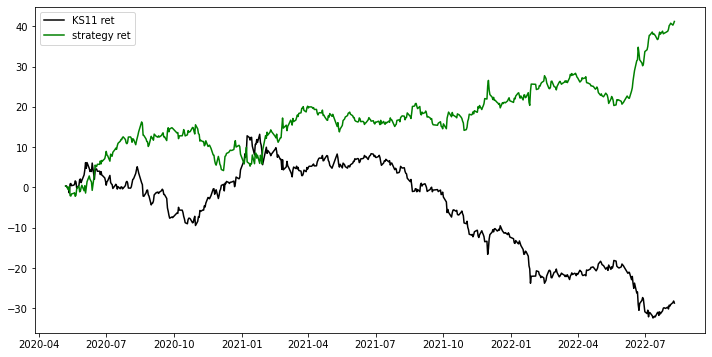

In [8]:
tmp_df['Predicted_Signal'] = knn.predict(X)

tmp_df['KS11_ret'] = np.log(tmp_df['Close'] / tmp_df['Open'])
cum_spy_ret = tmp_df[split:]['KS11_ret'].cumsum() * 100

tmp_df['strategy_ret'] = tmp_df['KS11_ret'] * tmp_df['Predicted_Signal'].shift(1)
cum_st_ret = tmp_df[split:]['strategy_ret'].cumsum() * 100

plt.figure(figsize=(12,6))
plt.plot(cum_spy_ret, color='black',label='KS11 ret')
plt.plot(cum_st_ret , color='green', label='strategy ret')
plt.legend()
plt.show()

* 코스피 지수가 하락하는 구간인 2021년 7월 부근부터 바이앤홀드 전략을 구사했을 경우와 시그널에 따라 매매했을 경우의 수익률 그래프입니다. 하락 구간을 학습하며 공매도 빈도를 늘림에 따라 주가 하락 시 수익률 방어가 가능했던 점을 알 수 있습니다.

In [9]:
# 상승 예측 빈도와, 하락 예측 빈도
print('TOTAL : ',tmp_df['Predicted_Signal'].count())
print('UP predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == 1,['Predicted_Signal']].count()[0])
print('DOWN predict : ',tmp_df.loc[tmp_df['Predicted_Signal'] == -1,['Predicted_Signal']].count()[0])

TOTAL :  1873
UP predict :  755
DOWN predict :  1118


### 샤프지수

In [10]:
std = cum_st_ret.std()
sharpe = (cum_st_ret - cum_spy_ret) / std
sharpe = sharpe.mean()
print('Sharpe ratio : %.2f' % sharpe)

Sharpe ratio : 2.72


* 샤프지수도 매우 높은 편이지만, 단일 전략으로 사용하기엔 위험합니다. 특히 훈련 기간과 테스트 전략이 짧은 것이 문제가 될 소지가 높습니다. 
* 만약 데이터에 추세(trend)나 계절성(seasonality)이 있다면 KNN은 잘 포착하지 못할 것입니다. 따라서 사전에 데이터 검증을 통해 추세나  
계절성을 분해(decompose)한다면 좋은 결과를 낼 것입니다.  
* 하지만 머신러닝 전략이 아무리 좋은 성과를 내더라도, 단일 전략으로 사용하기보다 다양한 전략과 함께 사용해야 합니다.

## KNN 투자전략 백테스팅

In [11]:
# 단순 바이앤 홀드 전략으로 했을 때의 누적 수익률
test1 = tmp_df[split:]['KS11_ret']
KS11_backtest = test1.cumsum()

# 시그널 기반으로 했을 때의 누적 수익률
test2 = tmp_df[split:]['strategy_ret']
KNN_backtest = test2.cumsum()

pd.DataFrame([KS11_backtest.tail(), KNN_backtest.tail()]).T

,KS11_ret,strategy_ret
Date,,
2022-08-04,-0.294399,0.403667
2022-08-05,-0.290630,0.407436
2022-08-08,-0.285833,0.402640
2022-08-09,-0.281875,0.406598
2022-08-10,-0.287029,0.411752


#**3. 군집분석을 활용한 주식 종목 분류**

* 주식 투자에서 종목을 선정할 때는 누구나 수익률이 높은 종목을 원할 것입니다.
* 하지만 어떤 종목이 상승하고 어떤 종목이 하락할 것인지 확신하기가 어렵습니다. 
* 따라서 포트폴리오를 최대한 다각화해 위험을 분산하는 작업이 필요합니다. 
* 머신러닝 기반의 클러스터링 알고리즘은 사람이 직관적으로 찾을 수 없는 고차원 공간의 분포를 군집화해줄 것이라 기대할 수 있습니다.

* 자신만의 독자적 인사이트를 가미해 판단하는 것이 좋습니다
    * 섹터별로 할 것인지
    * 변동성에 기반할 것인지
    * 가격의 움직임을 중심으로 할 것인지
    * 재무제표를 활용할 것인지
    * 단순 수익률의 변화 패턴을 활용할 것인지


## 데이터

In [12]:
# 사이킷런의 전처리 모듈인 normalizer와 minmaxscaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns

In [43]:
from bs4 import BeautifulSoup
import pandas as pd
import csv
import os
import re
import requests

stock_list = []
BaseUrl = 'http://finance.naver.com/sise/entryJongmok.nhn?&page='

for i in range(1, 21):
    url = BaseUrl + str(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    items = soup.find_all('td', {'class': 'ctg'})

    for item in items:
        #print(item)
        txt = item.a.get('href') 
        k = re.search('[\d]+', txt) ##정규표현식 사용. [\d] 숫자표현, + : 반복
        
        if k:
            code = k.group()
            name = item.text
            data = code, name
            stock_list.append(data)
            

# 코스피 상위 200 종목 이름 가져오기
stock_name = []            
for i in range(len(stock_list)):
    stock_name.append(stock_list[i][1])
    
stock_code = []
for i in range(len(stock_list)):
    stock_code.append(stock_list[i][0])

In [44]:
a = pd.DataFrame(stock_code)
b = pd.DataFrame(stock_name)
df_krx = pd.concat([a,b], axis=1)
df_krx.columns = ["Symbol","Name"]
df_krx

,Symbol,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,051910,LG화학
5,035420,NAVER
6,006400,삼성SDI
7,005380,현대차
8,035720,카카오
9,000270,기아


In [45]:
# 코스피 상위 200 종목 업종 가져오기

krx = fdr.StockListing("KRX")
krx

df_kospi_200 = pd.merge(left=df_krx, right=krx, how="left", on="Symbol")
df_kospi_200 = df_kospi_200[["Symbol","Name_x","Sector"]]
df_kospi_200.columns = ["Symbol", "Name", "Sector"]
df_kospi_200.head()

,Symbol,Name,Sector
0,005930,삼성전자,통신 및 방송 장비 제조업
1,373220,LG에너지솔루션,일차전지 및 축전지 제조업
2,000660,SK하이닉스,반도체 제조업
3,207940,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업
4,051910,LG화학,기초 화학물질 제조업


In [46]:
# 2017년 1월부터 Kospi200 기업의 종가 가져오기

close_list = []
for symbol in stock_code:
    try:
        close = fdr.DataReader(symbol,"2017")["Close"]
        close = pd.DataFrame(close)
        close.columns = [symbol]
        close_list.append(close)
    except:
        pass
    close_df = pd.concat(close_list, axis=1)

close_df.sort_index(inplace=True)

close_df.head()

,005930,373220,000660,207940,051910,035420,006400,005380,035720,000270,...,003850,004490,192820,241590,192080,020000,284740,105630,000070,057050
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,36100,NaN,45800,154668,253000,155620,106000,150000,15394,39500,...,9166,37250,110277,7600,38500,34250,NaN,26900,118500,112500
2017-01-03,36480,NaN,47250,156151,262000,153617,110000,153000,16057,40750,...,8970,37250,114198,7650,39100,33150,NaN,26900,116500,110000
2017-01-04,36160,NaN,46500,152692,268500,162230,108500,154000,16920,41300,...,9045,37350,115178,7650,38350,32450,NaN,26900,115000,107500
2017-01-05,35560,NaN,46950,155657,267500,158424,112000,153500,16860,41100,...,9045,37200,118119,7500,38000,32950,NaN,25550,116000,109500
2017-01-06,36200,NaN,48000,155657,266000,160026,113000,151000,16800,40750,...,8789,37000,121059,7300,38100,33600,NaN,25450,114500,108000


In [47]:
# 수익률 변화의 정도를 계산하고, 전치를 이용해 symbol을 Index로 사용한다.
ks200 = close_df.pct_change().iloc[1:].T
ks200.head()

Date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-16,...,2022-07-28,2022-07-29,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-08,2022-08-09,2022-08-10
005930,0.010526,-0.008772,-0.016593,0.017998,0.028177,0.000537,0.027927,0.013584,-0.034536,-0.021356,...,0.001618,-0.008078,-0.001629,0.006525,-0.006483,0.003263,0.000000,-0.011382,-0.013158,-0.015000
373220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055909,0.015644,-0.005924,-0.005959,0.047962,0.013730,0.006772,0.002242,0.023490,0.001093
000660,0.031659,-0.015873,0.009677,0.022364,0.032292,0.004036,0.037186,-0.019380,-0.005929,-0.019881,...,-0.006000,-0.015091,-0.008172,-0.006179,0.010363,0.000000,0.010256,-0.022335,-0.012461,-0.034700
207940,0.009588,-0.022152,0.019418,0.000000,-0.019048,-0.022653,0.052978,-0.012575,-0.025483,-0.009801,...,0.026159,0.002317,0.015029,-0.013667,0.005774,0.004592,0.022857,0.005587,0.002222,-0.011086
051910,0.035573,0.024809,-0.003724,-0.005607,-0.005639,0.011342,0.046729,0.017857,-0.007018,-0.015901,...,0.058407,0.008361,0.016584,-0.004894,0.006557,-0.008143,0.054187,0.015576,0.029141,-0.034277


In [48]:
# NaN 값 처리 : KS200의 경우, 오랜 세월 S%P500에 머무르는 미국과 다르게 기업들의 변동이 심하다.
# 따라서, 2017년부터 계속해서 자리해온 비교적 최근 상장 기업이 아닌 170개 기업들을 대상으로 군집화 실시.
# 수익률 변동성을 이용한 전략

ks200 = ks200.dropna(how="any")
ks200

Date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-16,...,2022-07-28,2022-07-29,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-08,2022-08-09,2022-08-10
005930,0.010526,-0.008772,-0.016593,0.017998,0.028177,0.000537,0.027927,0.013584,-0.034536,-0.021356,...,0.001618,-0.008078,-0.001629,0.006525,-0.006483,0.003263,0.000000,-0.011382,-0.013158,-0.015000
000660,0.031659,-0.015873,0.009677,0.022364,0.032292,0.004036,0.037186,-0.019380,-0.005929,-0.019881,...,-0.006000,-0.015091,-0.008172,-0.006179,0.010363,0.000000,0.010256,-0.022335,-0.012461,-0.034700
207940,0.009588,-0.022152,0.019418,0.000000,-0.019048,-0.022653,0.052978,-0.012575,-0.025483,-0.009801,...,0.026159,0.002317,0.015029,-0.013667,0.005774,0.004592,0.022857,0.005587,0.002222,-0.011086
051910,0.035573,0.024809,-0.003724,-0.005607,-0.005639,0.011342,0.046729,0.017857,-0.007018,-0.015901,...,0.058407,0.008361,0.016584,-0.004894,0.006557,-0.008143,0.054187,0.015576,0.029141,-0.034277
035420,-0.012871,0.056068,-0.023461,0.010112,-0.025027,0.016690,0.005050,0.007533,-0.014960,0.005062,...,0.004065,0.048583,0.000000,0.000000,0.038610,0.016729,-0.023766,-0.031835,0.025145,-0.011321
006400,0.037736,-0.013636,0.032258,0.008929,0.026549,0.004310,0.000000,0.000000,0.008584,-0.034043,...,0.039568,-0.015571,0.024605,-0.018868,0.024476,0.005119,0.015280,-0.001672,0.030151,-0.004878
005380,0.020000,0.006536,-0.003247,-0.016287,-0.003311,0.009967,-0.023026,-0.003367,0.006757,0.010067,...,-0.005102,0.005128,0.000000,0.002551,0.002545,-0.002538,-0.010178,0.007712,-0.012755,-0.005168
035720,0.043069,0.053746,-0.003546,-0.003559,-0.010774,-0.009688,0.014643,-0.015630,0.024456,-0.015499,...,0.006954,0.033149,-0.010695,-0.029730,0.058496,0.075000,-0.006120,0.009852,0.014634,-0.034856
000270,0.031646,0.013497,-0.004843,-0.008516,-0.009816,0.003717,-0.004938,0.006203,0.000000,-0.001233,...,-0.003713,0.008696,-0.009852,0.009950,0.001232,0.000000,-0.009840,0.011180,0.001229,-0.009816
068270,-0.014781,-0.004693,0.002827,-0.010329,-0.013296,0.000000,0.000000,-0.012516,0.000971,-0.005841,...,0.002639,0.000000,-0.013158,-0.008000,0.000000,0.016129,0.042328,0.032995,0.039312,0.000000


In [49]:
# 회사명 리스트와 값의 리스트를 저장
companies = list(ks200.index)
companies
movements = ks200.values
movements

array([[ 0.01052632, -0.00877193, -0.01659292, ..., -0.01138211,
        -0.01315789, -0.015     ],
       [ 0.03165939, -0.01587302,  0.00967742, ..., -0.02233503,
        -0.01246106, -0.03470032],
       [ 0.00958828, -0.02215164,  0.01941818, ...,  0.00558659,
         0.00222222, -0.01108647],
       ...,
       [ 0.        ,  0.        , -0.05018587, ..., -0.025     ,
         0.02279202, -0.05571031],
       [-0.01687764, -0.01287554,  0.00869565, ...,  0.00677507,
         0.00269179,  0.00134228],
       [-0.02222222, -0.02272727,  0.01860465, ..., -0.00976562,
         0.00591716, -0.00196078]])

## 데이터 정규화

In [50]:
# 데이터 정규화
normalize = Normalizer()
norm_array = normalize.fit_transform(ks200)
df_norm = pd.DataFrame(norm_array, columns = ks200.columns)
final_df = df_norm.set_index(ks200.index)
final_df.head(10)

Date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-16,...,2022-07-28,2022-07-29,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-08,2022-08-09,2022-08-10
005930,0.017581,-0.014651,-0.027713,0.030059,0.047060,0.000897,0.046643,0.022688,-0.057681,-0.035668,...,0.002703,-0.013491,-0.002720,0.010898,-0.010828,0.005449,0.000000,-0.019010,-0.021976,-0.025053
000660,0.037149,-0.018625,0.011355,0.026242,0.037891,0.004736,0.043634,-0.022740,-0.006957,-0.023328,...,-0.007040,-0.017707,-0.009588,-0.007251,0.012159,0.000000,0.012035,-0.026208,-0.014622,-0.040717
207940,0.009597,-0.022172,0.019436,0.000000,-0.019066,-0.022674,0.053027,-0.012587,-0.025507,-0.009810,...,0.026184,0.002320,0.015043,-0.013680,0.005779,0.004597,0.022878,0.005592,0.002224,-0.011097
051910,0.037452,0.026119,-0.003921,-0.005904,-0.005937,0.011941,0.049197,0.018800,-0.007388,-0.016741,...,0.061492,0.008803,0.017460,-0.005152,0.006904,-0.008573,0.057049,0.016399,0.030680,-0.036087
035420,-0.016382,0.071363,-0.029860,0.012871,-0.031855,0.021243,0.006427,0.009588,-0.019041,0.006443,...,0.005174,0.061836,0.000000,0.000000,0.049143,0.021292,-0.030249,-0.040520,0.032005,-0.014409
006400,0.040025,-0.014463,0.034215,0.009470,0.028159,0.004572,0.000000,0.000000,0.009104,-0.036107,...,0.041968,-0.016515,0.026097,-0.020012,0.025960,0.005430,0.016207,-0.001774,0.031979,-0.005174
005380,0.025091,0.008200,-0.004073,-0.020432,-0.004154,0.012504,-0.028887,-0.004224,0.008477,0.012630,...,-0.006401,0.006434,0.000000,0.003200,0.003192,-0.003184,-0.012769,0.009675,-0.016002,-0.006483
035720,0.050159,0.062594,-0.004130,-0.004145,-0.012547,-0.011282,0.017054,-0.018203,0.028481,-0.018050,...,0.008099,0.038606,-0.012456,-0.034624,0.068125,0.087346,-0.007127,0.011474,0.017043,-0.040594
000270,0.039665,0.016917,-0.006070,-0.010674,-0.012303,0.004660,-0.006190,0.007776,0.000000,-0.001546,...,-0.004654,0.010899,-0.012349,0.012472,0.001544,0.000000,-0.012334,0.014013,0.001540,-0.012303
068270,-0.013165,-0.004180,0.002518,-0.009200,-0.011842,0.000000,0.000000,-0.011148,0.000865,-0.005202,...,0.002350,0.000000,-0.011719,-0.007125,0.000000,0.014365,0.037700,0.029387,0.035014,0.000000


## 본격적인 Clustering

In [51]:
# 시도해볼 클러스터 수를 지정합니다. 2~12
num_of_clusters = range(2,12)
# 에러를 계산하기 위한 빈 리스트 생성
error = []

# 가장 중요한 파라미터는 클러스터 개수.
# 클러스터링 후 fit() 함수를 이용해 데이터에 적합시킵니다.
for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(final_df)
    error.append(clusters.inertia_/100)    

# 계산된 값 데이터프레임으로 return
table=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})

table

,Cluster_Numbers,Error_Term
0,2,1.239906
1,3,1.205959
2,4,1.179289
3,5,1.151618
4,6,1.133713
5,7,1.119395
6,8,1.090023
7,9,1.076859
8,10,1.060258
9,11,1.049415


* 클러스터 개수가 늘어날 때마다 에러가 줄어드는 것을 확인할 수 있다.
* KMeans 알고리즘에서 최적의 클러스터를 선택하기 위해서는 엘보(elbow) 방법과 실루엣(silhouette) 방법을 사용할 수 있습니다.

## 엘보우 방법으로 최적의 클러스터링 개수 찾기

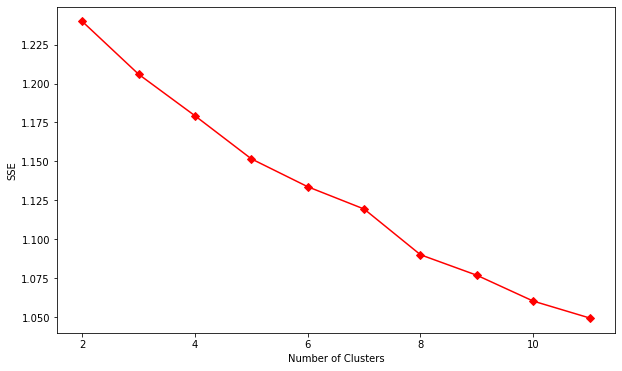

In [53]:
plt.figure(figsize=(10,6))
plt.plot(table.Cluster_Numbers, table.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [23]:
# 예시 : n_clusters = 7
clusters = KMeans(7, random_state=42)
clusters.fit(final_df)
clusters.labels_

labels = clusters.predict(movements)
print(labels)

cluster= pd.DataFrame({'labels' : labels, 'Symbol':companies})
cluster.head()

[4 4 6 4 4 4 2 4 2 6 2 5 2 2 2 5 3 4 3 5 2 2 5 4 2 1 2 2 5 3 4 4 5 2 3 4 3
 4 1 2 2 5 3 3 3 4 2 0 3 5 5 4 2 2 5 2 5 6 2 5 3 2 3 3 6 2 2 2 0 5 3 4 2 2
 5 2 2 1 2 3 3 1 1 3 6 1 5 5 3 5 5 3 3 3 2 3 4 3 5 3 3 5 5 4 2 3 1 6 0 2 6
 5 3 5 4 3 3 3 3 3 3 3 6 3 1 3 6 3 4 3 5 5 5 5 3 3 3 2 5 5 4 3 6 3 3 1 3 3
 6 3 1 6 1 3 1 3 3 3 1 5 3 3 3 1 3 3 3 3 3 3]


,labels,Symbol
0,4,005930
1,4,000660
2,6,207940
3,4,051910
4,4,035420


In [24]:
# 군집에 따른 회사명과 업종 데이터프레임 합쳐서 확인하기 
clustered_result = pd.merge(left=cluster, right=df_kospi_200, how="inner", on="Symbol")
clustered_result.sort_values("labels")

,labels,Symbol,Name,Sector
108,0,079550,LIG넥스원,무기 및 총포탄 제조업
47,0,047810,한국항공우주,"항공기,우주선 및 부품 제조업"
68,0,012450,한화에어로스페이스,"항공기,우주선 및 부품 제조업"
124,1,069960,현대백화점,종합 소매업
38,1,090430,아모레퍼시픽,기타 화학제품 제조업
158,1,039130,하나투어,여행사 및 기타 여행보조 서비스업
154,1,032350,롯데관광개발,여행사 및 기타 여행보조 서비스업
85,1,008770,호텔신라,기타 상품 전문 소매업
25,1,051900,LG생활건강,기타 화학제품 제조업
77,1,139480,이마트,종합 소매업


In [25]:
final_df['Cluster'] = clusters.labels_
final_df.head()

Date,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-16 00:00:00,...,2022-07-29 00:00:00,2022-08-01 00:00:00,2022-08-02 00:00:00,2022-08-03 00:00:00,2022-08-04 00:00:00,2022-08-05 00:00:00,2022-08-08 00:00:00,2022-08-09 00:00:00,2022-08-10 00:00:00,Cluster
005930,0.017581,-0.014651,-0.027713,0.030059,0.047060,0.000897,0.046643,0.022688,-0.057681,-0.035668,...,-0.013491,-0.002720,0.010898,-0.010828,0.005449,0.000000,-0.019010,-0.021976,-0.025053,4
000660,0.037149,-0.018625,0.011355,0.026242,0.037891,0.004736,0.043634,-0.022740,-0.006957,-0.023328,...,-0.017707,-0.009588,-0.007251,0.012159,0.000000,0.012035,-0.026208,-0.014622,-0.040717,4
207940,0.009597,-0.022172,0.019436,0.000000,-0.019066,-0.022674,0.053027,-0.012587,-0.025507,-0.009810,...,0.002320,0.015043,-0.013680,0.005779,0.004597,0.022878,0.005592,0.002224,-0.011097,6
051910,0.037452,0.026119,-0.003921,-0.005904,-0.005937,0.011941,0.049197,0.018800,-0.007388,-0.016741,...,0.008803,0.017460,-0.005152,0.006904,-0.008573,0.057049,0.016399,0.030680,-0.036087,4
035420,-0.016382,0.071363,-0.029860,0.012871,-0.031855,0.021243,0.006427,0.009588,-0.019041,0.006443,...,0.061836,0.000000,0.000000,0.049143,0.021292,-0.030249,-0.040520,0.032005,-0.014409,4


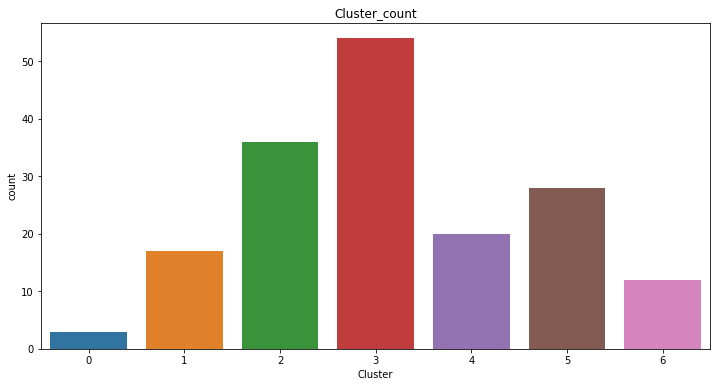

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Cluster', data = final_df)
plt.title('Cluster_count')
plt.show()
plt.savefig('cluster_count.png', dpi=300)

In [27]:
clustered_result.groupby('labels').get_group(0)

,labels,Symbol,Name,Sector
47,0,047810,한국항공우주,"항공기,우주선 및 부품 제조업"
68,0,012450,한화에어로스페이스,"항공기,우주선 및 부품 제조업"
108,0,079550,LIG넥스원,무기 및 총포탄 제조업


In [28]:
clustered_result.groupby('labels').get_group(1)

,labels,Symbol,Name,Sector
25,1,051900,LG생활건강,기타 화학제품 제조업
38,1,090430,아모레퍼시픽,기타 화학제품 제조업
77,1,139480,이마트,종합 소매업
81,1,002790,아모레G,기타 화학제품 제조업
82,1,023530,롯데쇼핑,종합 소매업
85,1,008770,호텔신라,기타 상품 전문 소매업
106,1,004170,신세계,종합 소매업
124,1,069960,현대백화점,종합 소매업
145,1,031430,신세계인터내셔날,"섬유, 의복, 신발 및 가죽제품 소매업"
150,1,114090,GKL,유원지 및 기타 오락관련 서비스업


In [29]:
clustered_result.groupby('labels').get_group(2)

,labels,Symbol,Name,Sector
6,2,005380,현대차,자동차용 엔진 및 자동차 제조업
8,2,000270,기아,자동차용 엔진 및 자동차 제조업
10,2,028260,삼성물산,기타 전문 도매업
12,2,012330,현대모비스,자동차 신품 부품 제조업
13,2,105560,KB금융,기타 금융업
14,2,055550,신한지주,기타 금융업
20,2,003550,LG,기타 금융업
21,2,032830,삼성생명,보험업
24,2,086790,하나금융지주,기타 금융업
26,2,017670,SK텔레콤,전기 통신업


In [30]:
clustered_result.groupby('labels').get_group(3)

,labels,Symbol,Name,Sector
16,3,034730,SK,기타 금융업
18,3,015760,한국전력,전기업
29,3,030200,KT,전기 통신업
34,3,003490,대한항공,항공 여객 운송업
36,3,009830,한화솔루션,기초 화학물질 제조업
42,3,097950,CJ제일제당,기타 식품 제조업
43,3,011170,롯데케미칼,기초 화학물질 제조업
44,3,018880,한온시스템,일반 목적용 기계 제조업
48,3,035250,강원랜드,유원지 및 기타 오락관련 서비스업
60,3,004990,롯데지주,기타 금융업


In [31]:
clustered_result.groupby('labels').get_group(4)

,labels,Symbol,Name,Sector
0,4,005930,삼성전자,통신 및 방송 장비 제조업
1,4,000660,SK하이닉스,반도체 제조업
3,4,051910,LG화학,기초 화학물질 제조업
4,4,035420,NAVER,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업"
5,4,006400,삼성SDI,일차전지 및 축전지 제조업
7,4,035720,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업"
17,4,066570,LG전자,통신 및 방송 장비 제조업
23,4,003670,포스코케미칼,"내화, 비내화 요업제품 제조업"
30,4,018260,삼성에스디에스,"컴퓨터 프로그래밍, 시스템 통합 및 관리업"
31,4,009150,삼성전기,전자부품 제조업


In [32]:
clustered_result.groupby('labels').get_group(5)

,labels,Symbol,Name,Sector
11,5,005490,POSCO홀딩스,1차 철강 제조업
15,5,096770,SK이노베이션,석유 정제품 제조업
19,5,034020,두산에너빌리티,일반 목적용 기계 제조업
22,5,011200,HMM,해상 운송업
28,5,010130,고려아연,1차 비철금속 제조업
32,5,010950,S-Oil,석유 정제품 제조업
41,5,009540,한국조선해양,선박 및 보트 건조업
49,5,010140,삼성중공업,선박 및 보트 건조업
50,5,000720,현대건설,토목 건설업
54,5,004020,현대제철,1차 철강 제조업


In [33]:
clustered_result.groupby('labels').get_group(6)

,labels,Symbol,Name,Sector
2,6,207940,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업
9,6,068270,셀트리온,기초 의약물질 및 생물학적 제제 제조업
57,6,000100,유한양행,의약품 제조업
64,6,128940,한미약품,의약품 제조업
84,6,008930,한미사이언스,기타 금융업
107,6,069620,대웅제약,의약품 제조업
110,6,006280,녹십자,의약품 제조업
122,6,003090,대웅,의약품 제조업
126,6,019170,신풍제약,의약품 제조업
142,6,185750,종근당,의약품 제조업


* 변동성이나 회사의 재무제표 데이터 등을 사용해 클러스터링하면 물론 다른 결과가 나올 것입니다.
* 시가총액을 기준으로 한 KOSPI200 기업 대상이기에, 오래전부터 한국 경제 성장의 발전이 된 조선, 철강 기업들이 분포가 가장 많은 것도 알 수 있습니다.
* 자세히 살펴보면 비슷한 섹터끼리 묶인 것을 확인할 수 있습니다.
    * 0 그룹에는 **도/소매 업종** 기업들이 분포
    * 1 그룹에는 **화장품, 백화점 기업**들이 분포
    * 2 그룹에는 **금융, 보험 기업**들이 분포
    * 3 그룹에는 **철강, 건설, 조선 기업**들이 분포
    * 4 그룹에는 **IT, 반도체 기업**들이 분포
    * 5 그룹에는 **자동차업 종사 기업**들이 분포
    * 6 그룹에는 **화학, 제약 기업**들이 분포


# **4. 백테스팅 및 성과 평가(기간별 주식 테마 별 수익률 비교)**

* 분류한 군집별로 2017-01-02 시점 기준으로 현재까지 얼마나 업종이 성장했는지 확인
    * 기간별 어떤 업종이 상승하고 하락했는지 비교해보기
    * 업종별 시가총액 기준 업종 지수 만들기
    * 지수화한 업종지수를 토대로 누적수익률 구하고 차트로 시각화

In [34]:
#!pip install pykrx

In [35]:
ks170_code = clustered_result.Symbol.tolist()

# group별 기업들의 리스트 만들기
group0 = clustered_result.groupby('labels').get_group(0)
list0 = group0.Symbol.tolist()

group1 = clustered_result.groupby('labels').get_group(1)
list1 = group1.Symbol.tolist()

group2 = clustered_result.groupby('labels').get_group(2)
list2 = group2.Symbol.tolist()

group3 = clustered_result.groupby('labels').get_group(3)
list3 = group3.Symbol.tolist()

group4 = clustered_result.groupby('labels').get_group(4)
list4 = group4.Symbol.tolist()

group5 = clustered_result.groupby('labels').get_group(5)
list5 = group5.Symbol.tolist()

group6 = clustered_result.groupby('labels').get_group(6)
list6 = group6.Symbol.tolist()



In [36]:
from pykrx import stock

## 시가총액 지수방식 사용
* 시가총액 지수산출 방식을 사용합니다.
* 비교시점 / 기준시점 * 100의 방식으로 각 군집별 지수를 산출하여
* 기준시점인 2017년 1월2일부터 현재까지 관련 업종이 얼마나 수익성이 떨어졌는지 혹은 올라갔는지를 검증합니다
* 코로나 구간이 포함되어있으므로, 정확하게 각 구간별 판단을 위해서는 diff를 사용하여 일별, 혹은 월별 지수를 계산하여 판별할 수 있겠지만
* 현재 구하고자 하는 것은 단순 업종 테마별 비교기 때문에 단순 바이앤홀드 전략으로 구성했습니다.

In [109]:
# 군집별 시가총액 크롤링해서 
# 얼마나 시총이 늘었는지 확인하기 위해 기준시점인 2017-01-02 Sum과 
# 비교 시점 2022-08-08 Sum을 시가총액 방식으로 지수 비교합니다.


def cluster_sum(list):
    price_list=[]
    for code in list:
        try:
            prices = stock.get_market_cap("20170101", "20220808", code)["시가총액"]
            prices = pd.DataFrame(prices)
            prices.columns = [code]
            price_list.append(prices)
        except:
            pass
        prices_df = pd.concat(price_list, axis=1)

    prices_df.sort_index(inplace=True)

    # 시가총액을 불러와서 Sum 컬럼에 저장
    prices_df["Sum"] = prices_df.sum(axis=1).astype(int)

    # 시가총액 지수방식 : 비교시점 / 기준시점 * 100
    res = prices_df.Sum[-1] / prices_df.Sum[0] * 100
    return pd.Series(res) 

In [218]:
zero = cluster_sum(list0)
one = cluster_sum(list1)
two = cluster_sum(list2)
three = cluster_sum(list3)
four = cluster_sum(list4)
five = cluster_sum(list5)
six = cluster_sum(list6)

cluster_df = pd.concat([zero,one,two,three,four,five,six], axis=1)
cluster_df.head()

,0,1,2,3,4,5,6
0,106.04,62.76,101.25,92.25,175.73,117.11,302.99


In [219]:
table = pd.DataFrame([[100,100,100,100,100,100,100]])
cluster_df = pd.concat([table, cluster_df], axis=0)

## 단순 바이앤홀드 전략 사용 시 수익률 확인

In [220]:
profit = cluster_df.pct_change()

In [221]:
cluster_df = cluster_df.append(profit.iloc[1] * 100)
cluster_df

,0,1,2,3,4,5,6
0,100.00,100.00,100.00,100.00,100.00,100.00,100.00
0,106.04,62.76,101.25,92.25,175.73,117.11,302.99
0,6.04,-37.24,1.25,-7.75,75.73,17.11,202.99


In [222]:
cluster_df = cluster_df.T
cluster_df.columns = ["기준시점", "비교시점", "바이앤홀드수익률(%)"]

In [223]:
pd.options.display.float_format = '{:.2f}'.format

cluster_df = cluster_df.T
cluster_df.columns = ["도/소매업", "화장품/백화점업", "금융업", "철강/건설/조선업", "IT,반도체업", "자동차업", "화학/제약업"]
cluster_df

,도/소매업,화장품/백화점업,금융업,철강/건설/조선업,"IT,반도체업",자동차업,화학/제약업
기준시점,100.00,100.00,100.00,100.00,100.00,100.00,100.00
비교시점,106.04,62.76,101.25,92.25,175.73,117.11,302.99
바이앤홀드수익률(%),6.04,-37.24,1.25,-7.75,75.73,17.11,202.99


## 결론
* 직관적으로 나온 수익률을 볼 경우, 코로나 기간이 포함되어 있기에 비교적 불황을 겪었던 화장품/백화점업의 수익률이 (-)인 것을 확인할 수 있었으며, 코로나 백신과 관련있던 화학/제약업종의 지수가 많이 올라갔음을 알 수 있었습니다.
* 좀 더 정확하게 기간별로 파악하고자 하면, 일별 혹은 월별로 resample하여 시가총액 기반 지수를 산출하여 보는 것이 옳습니다.
* 다만, 군집의 피쳐에 따라 군집이 달라지기 때문에 간접적으로 인사이트 도출할 때에만 사용하는 것이 좋습니다.
* 결론적으로는, 군집의 개수와 피쳐를 무엇을 쓰느냐에 따라 군집은 달라집니다.
    * 재무제표 기반의 전략(PBR, PER ,,,)
    * 거래량 기반의 전략(거래량, 거래대금, 거래량 회전율)
    * 시가총액 기반의 전략(시가총액 가중방식) - 가중치계산 필수!  
    등 다양한 방식을 통해 군집하여 **자신만의 전략**을 짤 수 있습니다.